# Market Sentiments

In [2]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sentiments = pd.read_excel("sentiments.xlsx", sheet_name='2020 - 2024')
sentiments['Date'] = sentiments['Date'].str.slice(0, 10)

ValueError: Worksheet named '2020 - 2024' not found

## Time Analysis

In [37]:
sentiments['Date'] = pd.to_datetime(sentiments['Date'])

### Average Rating Per Day

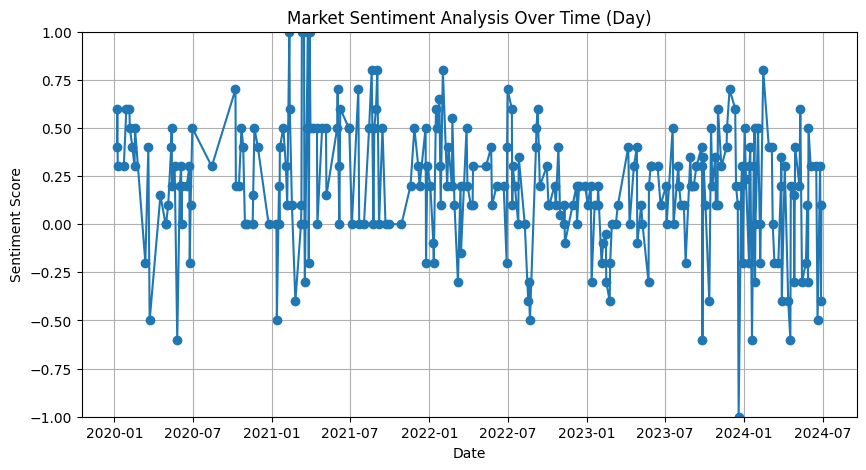

In [38]:
sentiments_day = sentiments.groupby('Date').agg({'Rating': 'mean'}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(sentiments_day['Date'], sentiments_day['Rating'], marker='o')

plt.title('Market Sentiment Analysis Over Time (Day)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)

plt.show()


### Average Rating Per Month

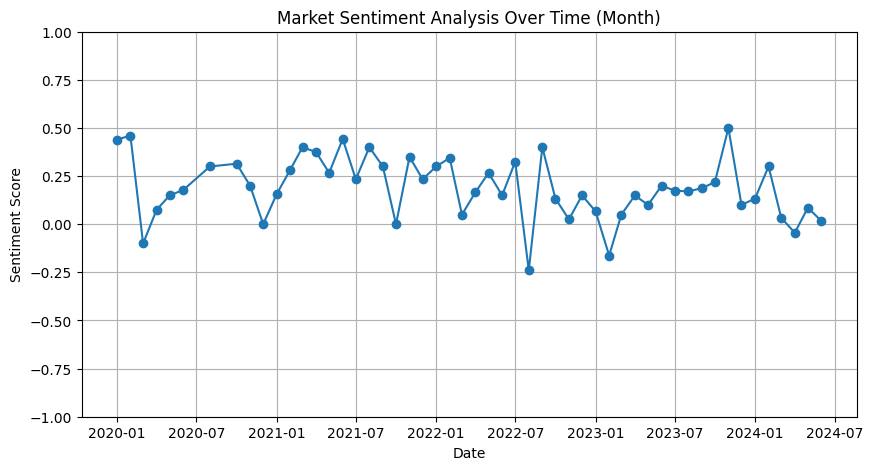

In [46]:
sentiments['Year Month'] = sentiments['Date'].dt.to_period('M')
sentiments_month = sentiments.groupby('Year Month').agg({'Rating': 'mean'}).reset_index()
sentiments_month['Year Month'] = sentiments_month['Year Month'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
plt.plot(sentiments_month['Year Month'], sentiments_month['Rating'], marker='o')

plt.title('Market Sentiment Analysis Over Time (Month)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)

plt.show()

### Average Rating Per Quarter

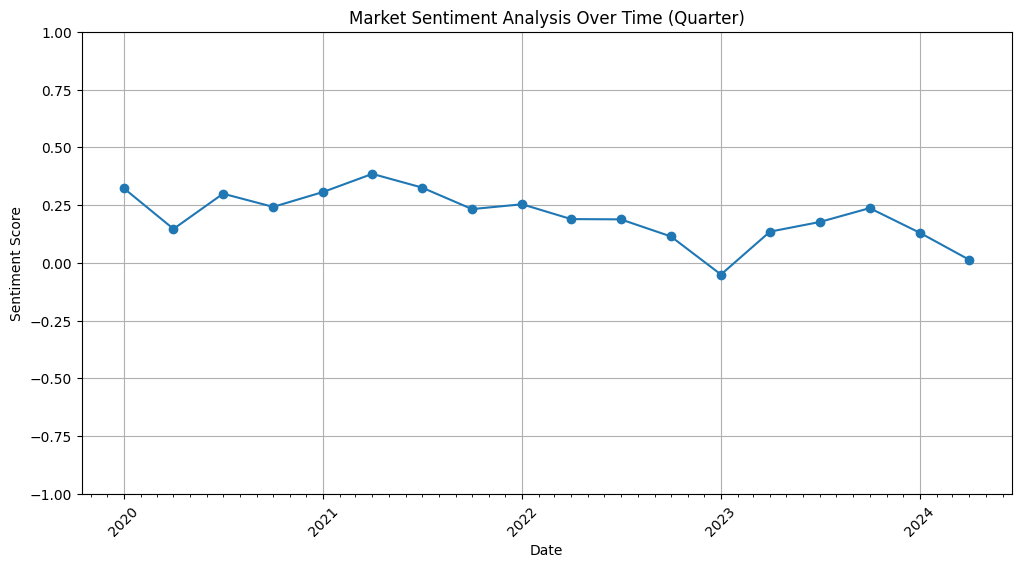

In [53]:
import matplotlib.dates as mdates

sentiments['Year Quarter'] = sentiments['Date'].dt.to_period('Q')
sentiments_quarter = sentiments.groupby('Year Quarter').agg({'Rating': 'mean'}).reset_index()
sentiments_quarter['Year Quarter'] = sentiments_quarter['Year Quarter'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(sentiments_quarter['Year Quarter'], sentiments_quarter['Rating'], marker='o')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.title('Market Sentiment Analysis Over Time (Quarter)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

### Forecasting

In [72]:
%pip install statsmodels scikit-learn pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 13.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


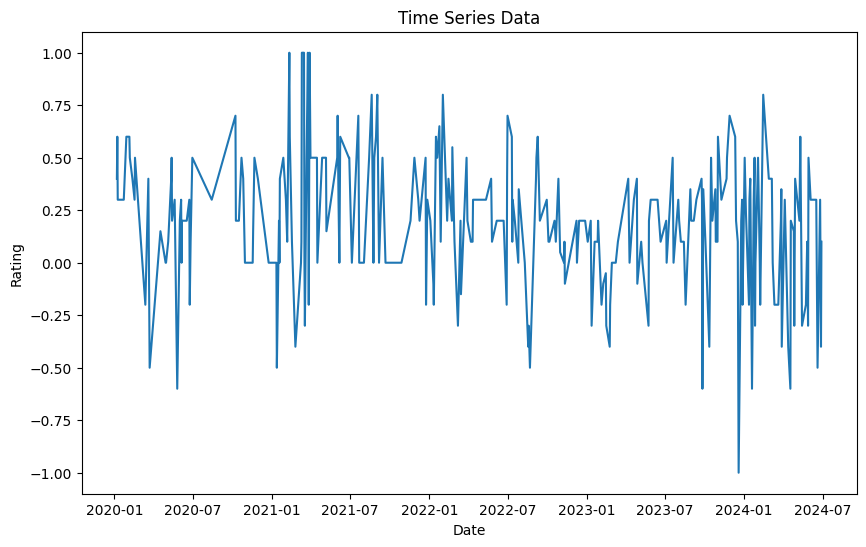

ADF Statistic: -12.32920953196647
p-value: 6.484173981173838e-23


/Users/loowenwen/Desktop/Visual Code Studio/jtc-market-sentiments/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/loowenwen/Desktop/Visual Code Studio/jtc-market-sentiments/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/loowenwen/Desktop/Visual Code Studio/jtc-market-sentiments/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/loowenwen/Desktop/Visual Code Studio/jtc-market-sentiments/venv

Test MSE: 0.1435474825715236


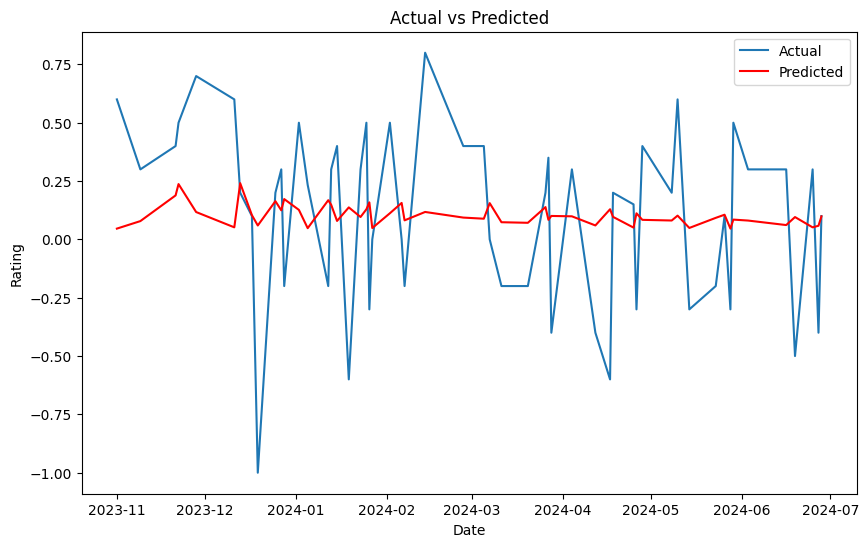

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

data = pd.read_excel('sentiments.xlsx', usecols=['Date', 'Rating 1'])

data_day = data.groupby('Date').mean().reset_index()
data_day['Date'] = pd.to_datetime(data_day['Date'])
data_day.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data_day)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

train_size = int(len(data_day) * 0.8)
train, test = data_day[:train_size], data_day[train_size:]

result = adfuller(train['Rating 1'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    train = train.diff().dropna()

p, d, q = 10, 2, 5  # parameters
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

error = mean_squared_error(test['Rating 1'], predictions)
print('Test MSE:', error)

plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Rating 1'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend()
plt.show()

## Analysis

In [17]:
import pandas as pd

new_file = '/Users/loowenwen/Downloads/Market Sentiments (2020-2024).xlsx'
new_data = pd.read_excel(new_file)

file = 'sentiments.xlsx'
data = pd.read_excel(file)

new_data = new_data[['URLs', 'Rating 2']]
joined_data = pd.merge(data, new_data, on='URLs', how='left')


In [18]:
joined_data

,URLs,Source,Quarter,Date,Text,Rating 1,Rating 2
0,https://www.straitstimes.com/business/singapor...,straits times,2024 Q2,2024-05-10,Samuel OhSINGAPORE - Sales of shophouses in Si...,0.6,Neutral
1,https://www.straitstimes.com/business/singapor...,straits times,2024 Q2,2024-04-12,SINGAPORE - A blockbuster deal backed by a Chi...,-0.4,Negative
2,https://www.straitstimes.com/business/singapor...,straits times,2024 Q2,2024-05-23,SINGAPORE - The economy grew in the first quar...,-0.2,Neutral
3,https://www.straitstimes.com/business/singapor...,straits times,2024 Q2,2024-04-26,SINGAPORE - Singapores factory output fell 9.2...,-0.5,Negative
4,https://www.straitstimes.com/business/ramp-up-...,straits times,2024 Q2,2024-06-25,SINGAPORE - The ramp-up in private residential...,0.3,Neutral
...,...,...,...,...,...,...,...
302,https://www.businesstimes.com.sg/property/new-...,business times,2020 Q1,2020-02-06,LoginThey can apply to be exempted if they hav...,0.5,Neutral
303,https://www.businesstimes.com.sg/property/coll...,business times,2020 Q1,2020-01-29,LoginFollowSINGAPORE property investment sales...,0.6,Positive
304,https://sbr.com.sg/manufacturing/news/seppure-...,singapore business review,2020 Q1,2020-01-08,Singapore Business Review website works best w...,0.6,Neutral
305,https://sbr.com.sg/economy/news/inflation-rate...,singapore business review,2020 Q1,2020-01-23,Singapore Business Review website works best w...,0.3,Neutral


In [19]:
def check_ratings(rating1, rating2):
    if rating2 == 'Negative' and -1 <= rating1 < 0:
        return True
    elif rating2 == 'Neutral' and 0 <= rating1 <= 0:
        return True
    elif rating2 == 'Positive' and 0 < rating1 <= 1:
        return True
    else:
        return False

joined_data['Ratings Match'] = joined_data.apply(
    lambda row: check_ratings(row['Rating 1'], row['Rating 2']),
    axis=1
)

In [20]:
joined_data

,URLs,Source,Quarter,Date,Text,Rating 1,Rating 2,Ratings Match
0,https://www.straitstimes.com/business/singapor...,straits times,2024 Q2,2024-05-10,Samuel OhSINGAPORE - Sales of shophouses in Si...,0.6,Neutral,False
1,https://www.straitstimes.com/business/singapor...,straits times,2024 Q2,2024-04-12,SINGAPORE - A blockbuster deal backed by a Chi...,-0.4,Negative,True
2,https://www.straitstimes.com/business/singapor...,straits times,2024 Q2,2024-05-23,SINGAPORE - The economy grew in the first quar...,-0.2,Neutral,False
3,https://www.straitstimes.com/business/singapor...,straits times,2024 Q2,2024-04-26,SINGAPORE - Singapores factory output fell 9.2...,-0.5,Negative,True
4,https://www.straitstimes.com/business/ramp-up-...,straits times,2024 Q2,2024-06-25,SINGAPORE - The ramp-up in private residential...,0.3,Neutral,False
...,...,...,...,...,...,...,...,...
302,https://www.businesstimes.com.sg/property/new-...,business times,2020 Q1,2020-02-06,LoginThey can apply to be exempted if they hav...,0.5,Neutral,False
303,https://www.businesstimes.com.sg/property/coll...,business times,2020 Q1,2020-01-29,LoginFollowSINGAPORE property investment sales...,0.6,Positive,True
304,https://sbr.com.sg/manufacturing/news/seppure-...,singapore business review,2020 Q1,2020-01-08,Singapore Business Review website works best w...,0.6,Neutral,False
305,https://sbr.com.sg/economy/news/inflation-rate...,singapore business review,2020 Q1,2020-01-23,Singapore Business Review website works best w...,0.3,Neutral,False
